In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the data
df = pd.read_excel('Online Retail.xlsx')

# print the first five rows of the data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
print(df.shape)

(541909, 8)


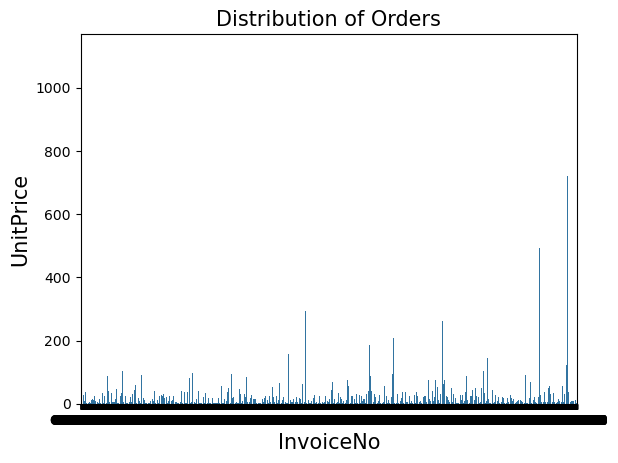

In [ ]:
# use 'countplot' to plot barplot for orders
sns.countplot(data = df, x = 'InvoiceNo')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Distribution of Orders', fontsize = 15)
plt.xlabel('InvoiceNo', fontsize = 15)
plt.ylabel('UnitPrice', fontsize = 15)

plt.show()

In [ ]:
# Drop rows with missing values in important columns (e.g., 'CustomerID', 'Quantity', 'UnitPrice')
df.dropna(subset=['CustomerID', 'Quantity', 'UnitPrice'], inplace=True)

# Remove negative quantities or prices (optional)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

# Create a 'TotalSpend' feature: Quantity * UnitPrice
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# Calculate Recency (How recent was the last purchase)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
last_purchase_date = df['InvoiceDate'].max()

df['Recency'] = (last_purchase_date - df['InvoiceDate']).dt.days

# Frequency (how often the customer purchases)
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Monetary (how much the customer spends)
monetary = df.groupby('CustomerID')['TotalSpend'].sum()

# Combine into a new DataFrame
rfm_df = pd.DataFrame({'Recency': df.groupby('CustomerID')['Recency'].min(),
                       'Frequency': frequency,
                       'Monetary': monetary})

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rfm_df)

NameError: name 'StandardScaler' is not defined

In [ ]:
# Elbow Method to find optimal clusters
distortions = []
for k in range(1, 11):  # Try different cluster sizes (1-10)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.show()

In [ ]:
# Apply K-means clustering
optimal_k = 4  # Set the number of clusters based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Show the result with cluster labels
print(rfm_df.head())

In [ ]:
# PCA for dimensionality reduction to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=rfm_df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()